# Sentiment Analysis with Python
This is an example of training a sentiment classifier with Python. 

The aims of this hands-on experiment are to present:
- the basics of data analysis
- how to pre-process a dataset and why it is important
- the (very) basics of supervised machine learning
- analysis of a classifier's results

We will use the [Women's E-commerce Clothing Review](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews) dataset with their rating scores.
Rating scores goes from 1 to 5, where 1 is the worst rating and 5 the best.

## You're using a notebook!
This is a 'notebook' and it allows us to work with a programming language called python. The notebook has cells. Some cells (like this one) are text. Others (like the one below) are code. It can be a little confusing! You can run code by clicking on the cell, then clicking the 'play' button on the left hand side (or pressing Ctrl-Enter). Try it for the cell below:

In [ ]:
food = "chocolate"
print("My favourite food is " + food + ".")

## Getting started
Let's get started! We need to get things set up, you can just run the next cell & move on, as this just gets things installed that we need later.

In [1]:
#by the way, in python text after a hash (#) is a comment! Like this!

#loading some libraries
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import re
import matplotlib.pyplot as plt
from urllib.request import urlopen
%matplotlib inline

In [2]:
#download and read the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/lionfish0/discover_stem/master/Womens%20Clothing%20E-Commerce%20Reviews.csv")
dataset

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


### Exercise 1
Try to print only the 'Rating' column. 

In [3]:
##exercise 1 area
#Here we print out their ages by adding ['Age'] to the dataset variable:
dataset['Age']

0        33
1        34
2        60
3        50
4        47
         ..
23481    34
23482    48
23483    31
23484    28
23485    52
Name: Age, Length: 23486, dtype: int64

## Data Analysis

In [4]:
#playing with graphs (here are just some basic configurations)
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 10
plot_size[1] = 10
plt.rcParams["figure.figsize"] = plot_size 

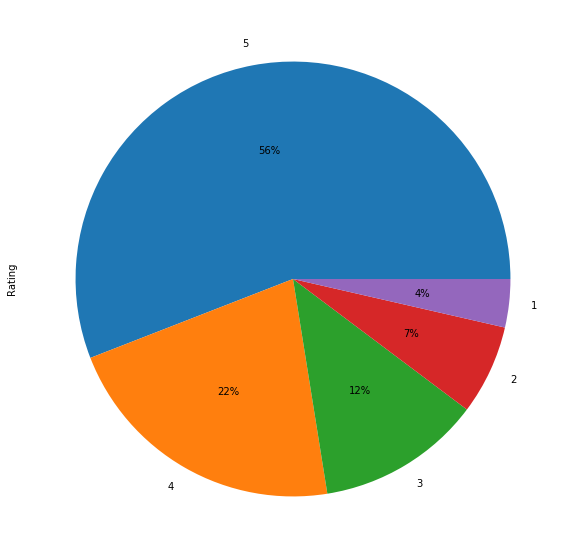

In [5]:
#ploting the distribution of ratings
dataset['Rating'].value_counts().plot(kind='pie', autopct='%1.0f%%')

#if you want a bar graph, you could uncomment (remove the #) from these three lines instead.
#dataset['Rating'].value_counts().plot(kind='bar')
#plt.xlabel('Rating')
#plt.ylabel('Number of reviews')

### Exercise 2
Try making the pie chart show the information in a different column. For example 'Department Name' or 'Class name', by modifying the code above. (tip: try replacing 'Rating' with 'Department Name').

In [6]:
##exercise 2 area
#dataset['Rating'].value_counts().plot(kind='pie', autopct='%1.0f%%')

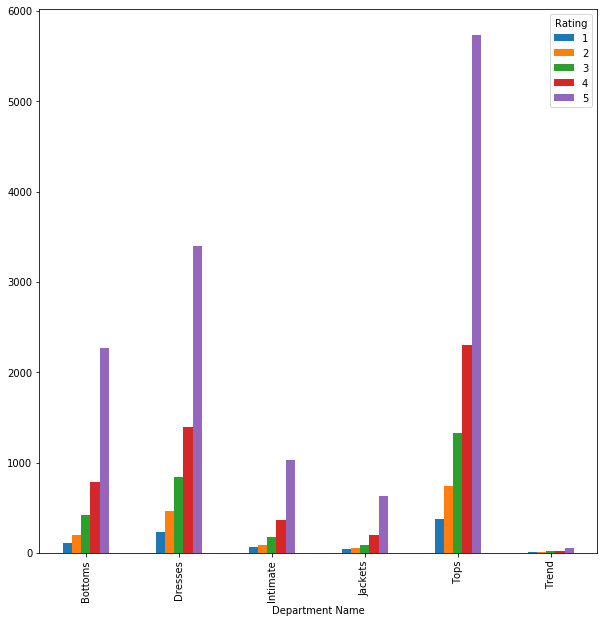

In [7]:
#why this graph can be misleading? 
clothes_sentiment = dataset.groupby(['Department Name', 'Rating'])['Rating'].count().unstack()
clothes_sentiment.plot(kind='bar')

** Number of each rating per department **
Rating             1    2     3     4     5
Department Name                            
Bottoms          115  205   421   785  2273
Dresses          228  461   838  1395  3397
Intimate          63   90   178   371  1033
Jackets           49   60    91   201   631
Tops             376  738  1324  2299  5731
Trend             11   11    19    26    52
** Sum of ratings per deparment **
Department Name
Bottoms      3799
Dresses      6319
Intimate     1735
Jackets      1032
Tops        10468
Trend         119
dtype: int64
** Percentage of each rating per department **
Rating                  1         2         3         4         5
Department Name                                                  
Bottoms          0.030271  0.053962  0.110819  0.206633  0.598315
Dresses          0.036082  0.072955  0.132616  0.220763  0.537585
Intimate         0.036311  0.051873  0.102594  0.213833  0.595389
Jackets          0.047481  0.058140  0.088178  0.194767 

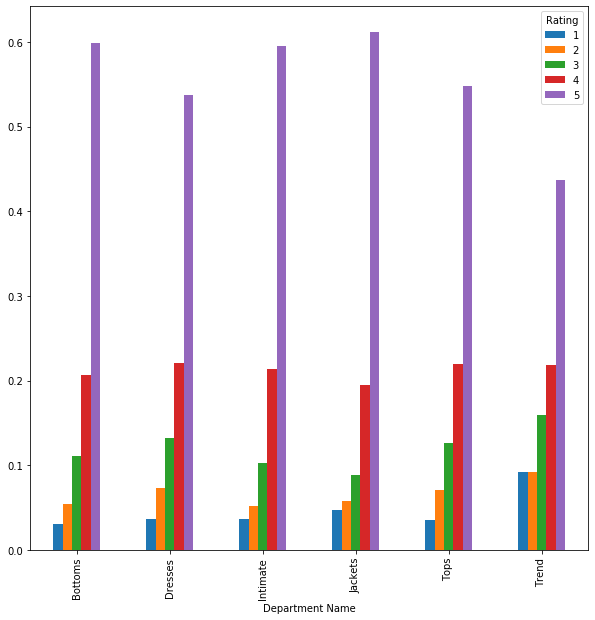

In [8]:
##Analysing according to the counts of ratings
clothes_sentiment_count = dataset.groupby(['Department Name', 'Rating'])['Rating'].count().unstack()
print("** Number of each rating per department **")
print(clothes_sentiment_count)
#sum per deparment
print("** Sum of ratings per deparment **")
dept_sum = clothes_sentiment_count.sum(axis=1)
print(dept_sum)
#percentage
clothes_sentiment_perc = (clothes_sentiment_count.transpose()/dept_sum).transpose()
print("** Percentage of each rating per department **")
print(clothes_sentiment_perc)
clothes_sentiment_perc.plot(kind='bar')

## Pre-processing

In [9]:
#analysing the text: any ideas of potential problems? 
dataset['Review Text'][2] #this is review number 2, try changing the '2', to read other reviews.

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [10]:
#transforming the review column into an array of reviews
features = np.array(dataset['Review Text'])
features

array(['Absolutely wonderful - silky and sexy and comfortable',
       'Love this dress!  it\'s sooo pretty.  i happened to find it in a store, and i\'m glad i did bc i never would have ordered it online bc it\'s petite.  i bought a petite and am 5\'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.',
       'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c',
       ...,
       "This fit well, but the top was very see through. this never would have worked for me. i

In [11]:
#creating the vector with the labels
#we are using the 'Rating' column as our labels, so we have 5 classes 
labels = [int(l) for l in dataset['Rating']]
labels

[4,
 5,
 3,
 5,
 5,
 2,
 5,
 4,
 5,
 5,
 3,
 5,
 5,
 5,
 3,
 4,
 3,
 5,
 5,
 5,
 4,
 4,
 2,
 3,
 5,
 3,
 2,
 4,
 5,
 5,
 5,
 5,
 5,
 2,
 5,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 5,
 3,
 5,
 4,
 5,
 2,
 3,
 4,
 4,
 5,
 1,
 5,
 5,
 5,
 4,
 4,
 5,
 2,
 3,
 4,
 2,
 5,
 4,
 5,
 5,
 4,
 2,
 5,
 4,
 5,
 5,
 5,
 5,
 3,
 1,
 4,
 4,
 2,
 4,
 4,
 5,
 5,
 5,
 4,
 5,
 1,
 1,
 5,
 3,
 4,
 4,
 5,
 2,
 2,
 5,
 4,
 4,
 5,
 5,
 1,
 3,
 5,
 5,
 2,
 4,
 4,
 5,
 2,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 4,
 5,
 4,
 5,
 4,
 3,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 5,
 5,
 4,
 5,
 5,
 3,
 3,
 5,
 5,
 5,
 5,
 5,
 4,
 3,
 3,
 3,
 5,
 5,
 3,
 4,
 4,
 4,
 1,
 4,
 5,
 4,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 5,
 4,
 5,
 5,
 2,
 5,
 5,
 4,
 5,
 4,
 2,
 2,
 4,
 5,
 4,
 4,
 4,
 2,
 5,
 5,
 3,
 5,
 5,
 5,
 5,
 3,
 3,
 5,
 3,
 5,
 4,
 3,
 5,
 4,
 5,
 1,
 5,
 4,
 4,
 5,
 1,
 5,
 2,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 2,
 5,
 5,
 5,
 5,
 2,
 5,
 3,
 4,
 1,
 5,
 4,
 3,
 5,
 3,
 4,
 5,
 4,


In [12]:
#splitting the data into training, validation and test sets
#training = data used to train the classifiers
#validation = data used to tune the classifiers' parameters (it will make more sense later)
#test = data used to test the classifiers
raw_train, raw_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
raw_train, raw_val, y_train, y_val = train_test_split(raw_train, y_train, train_size = 0.8)

In [13]:
#Pre-processing the reviews
#normalise words, remove punctuation, remove extra spaces, etc
def pre_proc(features):
    processed_features = []
    for sentence in range(0, len(features)):
        # Remove all tags (like <br />)
        processed_feature = re.sub(r'<.*?>', ' ', str(features[sentence]))

        #Remove all special characters
        processed_feature = re.sub(r'[^a-zA-Z0-9]', ' ', processed_feature)

        # Substituting multiple spaces with single space
        processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

        # Removing prefixed 'b'
        processed_feature = re.sub(r'^b\s+', '', processed_feature)
        
        # Removing everything that has numbers 
        #processed_feature = re.sub(r'\w*\d\w*', '', processed_feature)

        # Converting to Lowercase
        processed_feature = processed_feature.lower()

        processed_features.append(processed_feature)
    return processed_features

In [14]:
#apply pre_proc() function to all data splits
proc_train = pre_proc(raw_train)
proc_val = pre_proc(raw_val)
proc_test = pre_proc(raw_test)

### Exercise 3
Change the 'i' variable to see different examples of the original and pre-processed data

In [15]:
i = 5
print("ORIGINAL: %s" % raw_train[i])
print()
print("PRE-PROCESSED: %s" % proc_train[i])

ORIGINAL: I love this tunic. the fit is just lovely for me--i'm a large busted, muscular shouldered woman who wears a 4-6 on the bottom. the 8 fit perfectly across my chest (34ddd) without horrid, gaping armpits. and the gathered back gives just enough extra fabric so that the buttons do not pull at all in front--not easy to achieve in a button down for a big chested girl! i also love the cut and flow--it is fabulous and hip with skinny jeans and platform heels, but also cute with flat sandals for a day o

PRE-PROCESSED: i love this tunic the fit is just lovely for me i m a large busted muscular shouldered woman who wears a 4 6 on the bottom the 8 fit perfectly across my chest 34ddd without horrid gaping armpits and the gathered back gives just enough extra fabric so that the buttons do not pull at all in front not easy to achieve in a button down for a big chested girl i also love the cut and flow it is fabulous and hip with skinny jeans and platform heels but also cute with flat sand

## Feature Extraction
We will use bag-of-words as features for training our classifiers. In a bag-of-words approach, an algorithm counts the number of times a word appear in a document. Each word in the entire collection of documents (corpus) became a feature in the feature vector, which results in a sparse vector.

Instead of count the "number of times" a word appear in a document, we can also use a binary approach (whether or not a word a appear in a document). Any other ideas? 

In [16]:
def extract_features(binary=True, max_df=1.0, min_df=0.0, ngram_range=(1,1), sw=False):
#By default, we are using a binary bag-of-words approach: 
#if a word appears in a document it will receive 1 (0 otherwise)

    stop_words=[]
    if sw:
        f = urlopen("https://raw.githubusercontent.com/lionfish0/discover_stem/master/stopwords.txt").read()
        stop_words = list(np.array(f.split(), dtype=str))

    cv = CountVectorizer(binary=True, max_df=max_df, min_df=min_df, ngram_range=ngram_range, stop_words=stop_words)
    cv.fit(proc_train)

    #check the features outputted below
    #each possible word in our pre-processed vector became a feature
    #can we do better? 
    print("** Vocabulary size: %d" % len(cv.get_feature_names()))
    print("** Words:")
    print(cv.get_feature_names())

    #apply the model to all data splits
    #can you think of any problems? 
    X_train = cv.transform(proc_train)
    X_val = cv.transform(proc_val)
    X_test = cv.transform(proc_test)
    return X_train, X_val, X_test

In [17]:
#call the above function to extract features
X_train, X_val, X_test = extract_features(binary=True, max_df=1.0, min_df=0.0, ngram_range=(1,1), sw=False)

** Vocabulary size: 11686
** Words:
['00', '00p', '03', '04', '06', '0dd', '0p', '0petite', '0r', '0verall', '10', '100', '1000', '100lbs', '101', '102', '102lbs', '103', '103lbs', '104', '104lbs', '105', '105lbs', '106', '106lbs', '107', '107lb', '107lbs', '108', '108lbs', '109', '109lbs', '10lbs', '10mths', '10p', '10s', '11', '110', '110lb', '110lbs', '111', '112', '112lb', '112lbs', '112llbs', '113', '113lbs', '114', '114lbs', '115', '115ish', '115lb', '115lbs', '116', '116bs', '116ibs', '116lb', '116lbs', '117', '117lbs', '118', '118lb', '118lbs', '119', '11and', '11in', '11inches', '12', '120', '120lb', '120lbs', '121', '122', '122lb', '122lbs', '123', '123lbs', '124', '124lb', '124lbs', '125', '125ish', '125lb', '125lbs', '126', '126lbs', '127', '127lb', '127lbs', '128', '128b', '128lb', '128lbs', '129', '129lbs', '12p', '13', '130', '130lb', '130lbs', '130pounds', '132', '132lbs', '133', '133lbs', '134', '134b', '134lb', '134lbs', '135', '135lb', '135lbs', '136', '136lb', '136l

In [18]:
print(X_train)

  (0, 458)	1
  (0, 643)	1
  (0, 806)	1
  (0, 1760)	1
  (0, 3718)	1
  (0, 4967)	1
  (0, 5444)	1
  (0, 5457)	1
  (0, 5467)	1
  (0, 6856)	1
  (0, 6964)	1
  (0, 6999)	1
  (0, 7000)	1
  (0, 7080)	1
  (0, 7842)	1
  (0, 8473)	1
  (0, 8695)	1
  (0, 9041)	1
  (0, 9045)	1
  (0, 9440)	1
  (0, 10323)	1
  (0, 10382)	1
  (0, 10562)	1
  (0, 11472)	1
  (0, 11544)	1
  :	:
  (15029, 6649)	1
  (15029, 6663)	1
  (15029, 6791)	1
  (15029, 6882)	1
  (15029, 6964)	1
  (15029, 6965)	1
  (15029, 6998)	1
  (15029, 7233)	1
  (15029, 7270)	1
  (15029, 7624)	1
  (15029, 7869)	1
  (15029, 7984)	1
  (15029, 8518)	1
  (15029, 9059)	1
  (15029, 9072)	1
  (15029, 9095)	1
  (15029, 9893)	1
  (15029, 10323)	1
  (15029, 10333)	1
  (15029, 10350)	1
  (15029, 10502)	1
  (15029, 10554)	1
  (15029, 10777)	1
  (15029, 10984)	1
  (15029, 11432)	1


## Training classifiers

In [19]:
#just a function to print a nice confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
class_names = ['1', '2', '3', '4', '5']
np.set_printoptions(precision=2)

#evaluation function
def evaluate_classifier(cls, X_test, y_test):
    
    preds = cls.predict(X_test)
    print("*** Accuracy score: %.4f\n" % accuracy_score(y_test, preds))
    ax = plot_confusion_matrix(y_test, preds, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
    plt.plot()
    return preds

### Baseline: majority class classifier
Predicts all instances as the majority class 

In [20]:
#training the majority class classifier
dc = DummyClassifier(strategy="most_frequent")
dc.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

*** Accuracy score: 0.5615



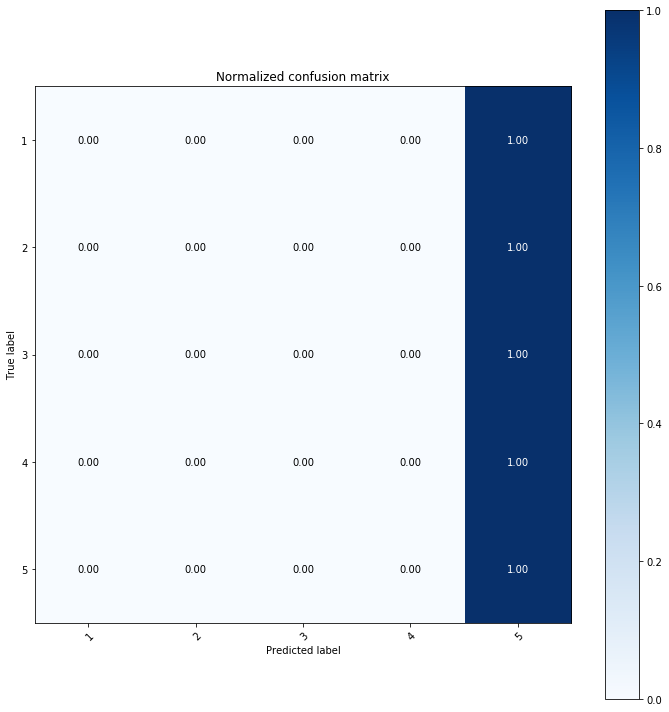

In [21]:
#evaluating it
dc_preds = evaluate_classifier(dc, X_test, y_test)

### First experiment: K-Nearest Neighbors


In [22]:
def train_knn(X_train, y_train, n_neighbors=3):  
    #training the classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    return knn

*** Accuracy score: 0.5189



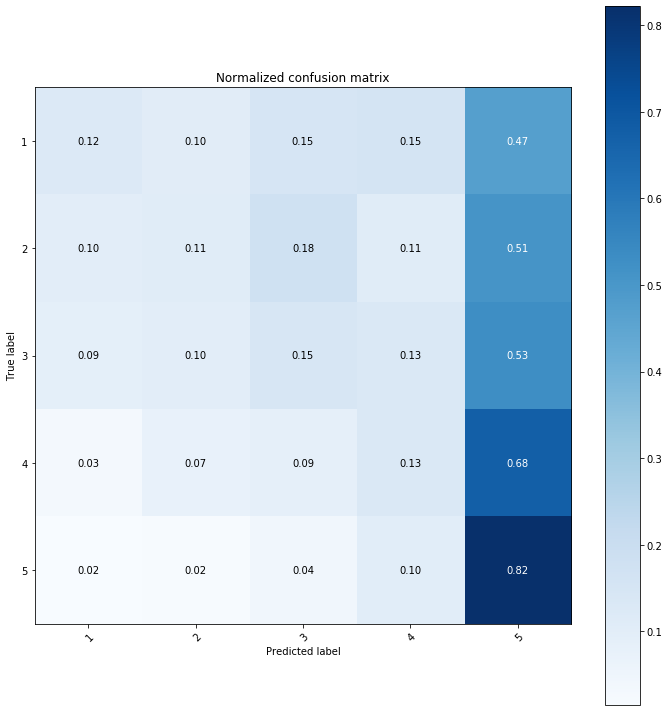

In [23]:
knn = train_knn(X_train, y_train, n_neighbors=3)
knn_preds = evaluate_classifier(knn, X_test, y_test)

### Exercise 4
Vary the value of 'n_neighbors' and see if you can improve the performance of the classifier.

*** Accuracy score: 0.5717



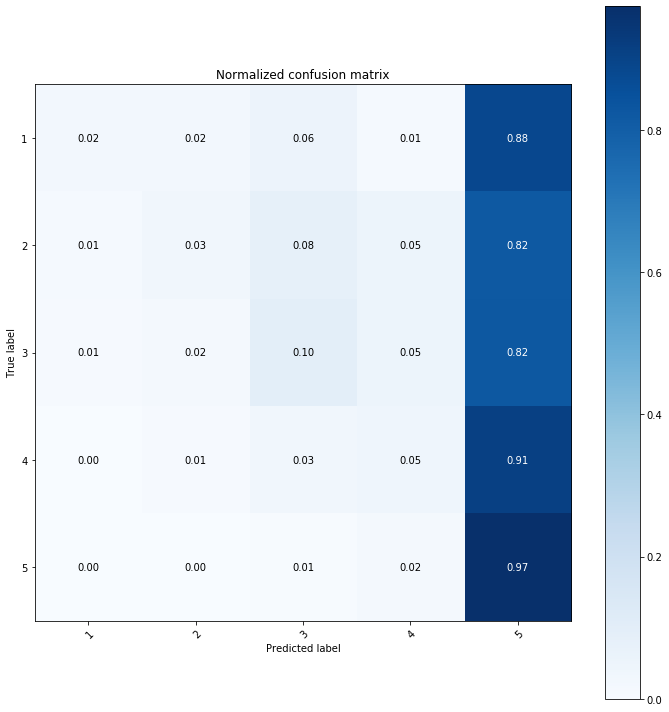

In [24]:
knn = train_knn(X_train, y_train, n_neighbors=10)
knn_preds = evaluate_classifier(knn, X_test, y_test)

### Exercise 5
Vary the value of 'i' to see more examples of the data and their predicted and true ratings

In [25]:
#print some samples of the data and compare predicted and true values
i = 1
print(raw_test[i])
print()
print("** Predicted value by KNN: %d" % knn_preds[i])
print("** True value: %d" % y_test[i])

The gorgeous coral color of this skirt makes it a great all seasons skirt. the slightly heavier weight of skirt makes it extremely adorable for fall/winter. pair it with some tights, chunky knit and booties, good to go. very flattering one. has a slight a-line cut to it. i love love this one.

** Predicted value by KNN: 5
** True value: 5


### Second experiment: Logistic Regression

In [26]:
def optimise_C(X_train, y_train, X_val, y_val, C=[0.01, 0.025, 0.05, 0.25, 0.5, 1.0]):
    #optimise the parameter C using the validation data
    best_acc = 0.
    best_c = 0.
    accuracies = []
    for c in C:
    
        lr = LogisticRegression(C=c, multi_class='auto', solver='liblinear')
        lr.fit(X_train, y_train)
        cur_acc = accuracy_score(y_val, lr.predict(X_val))
        print ("Accuracy for C=%s: %s" % (c, cur_acc))
        accuracies.append(cur_acc)
        if cur_acc > best_acc:
            best_c = c
            best_acc = cur_acc

    print ("*** Best accuracy = %f, best C = %f" % (best_acc, best_c))
    plt.plot(np.array(C).astype('str'), accuracies, 'ro')
    return best_c

    

Accuracy for C=0.01: 0.6245343267695582
Accuracy for C=0.025: 0.6370409792442788
Accuracy for C=0.05: 0.641830761043108
Accuracy for C=0.25: 0.6405002660989888
Accuracy for C=0.5: 0.636774880255455
Accuracy for C=1.0: 0.6253326237360298
*** Best accuracy = 0.641831, best C = 0.050000


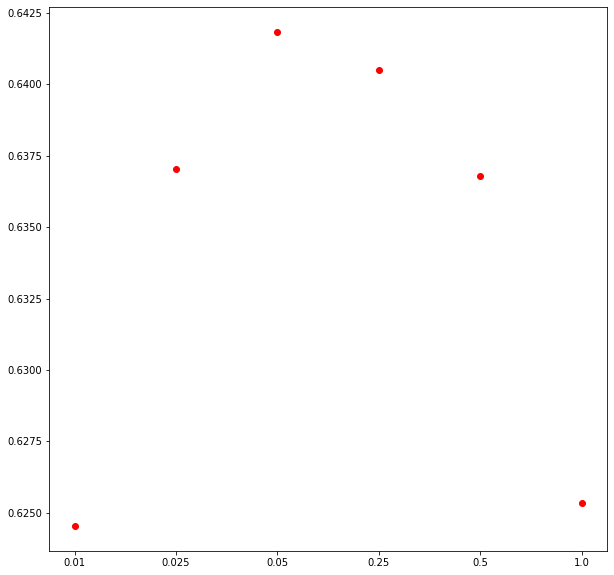

In [27]:
best_c = optimise_C(X_train, y_train, X_val, y_val, C=[0.01, 0.025, 0.05, 0.25, 0.5, 1.0])

### Exercise 6
Vary the values of the C list (positive real number)

Accuracy for C=0.01: 0.6245343267695582
Accuracy for C=0.025: 0.6370409792442788
Accuracy for C=0.05: 0.641830761043108
Accuracy for C=0.25: 0.6405002660989888
Accuracy for C=0.5: 0.636774880255455
Accuracy for C=1.0: 0.6253326237360298
Accuracy for C=2.0: 0.6170835550824907
*** Best accuracy = 0.641831, best C = 0.050000


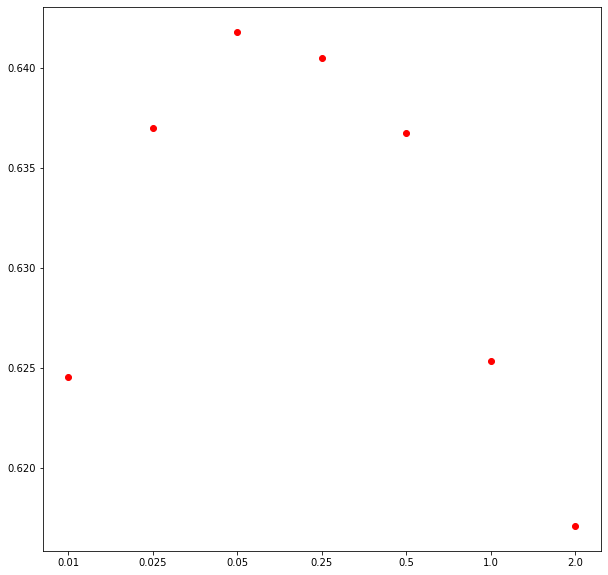

In [28]:
best_c = optimise_C(X_train, y_train, X_val, y_val, C=[0.01, 0.025, 0.05, 0.25, 0.5, 1.0, 2.0])

In [29]:
def train_lr(X_train, y_train, best_c=1.0):
    #training the model with the best C
    lr = LogisticRegression(C=best_c, multi_class='auto', solver='liblinear')
    lr.fit(X_train, y_train)
    return lr

*** Accuracy score: 0.6392



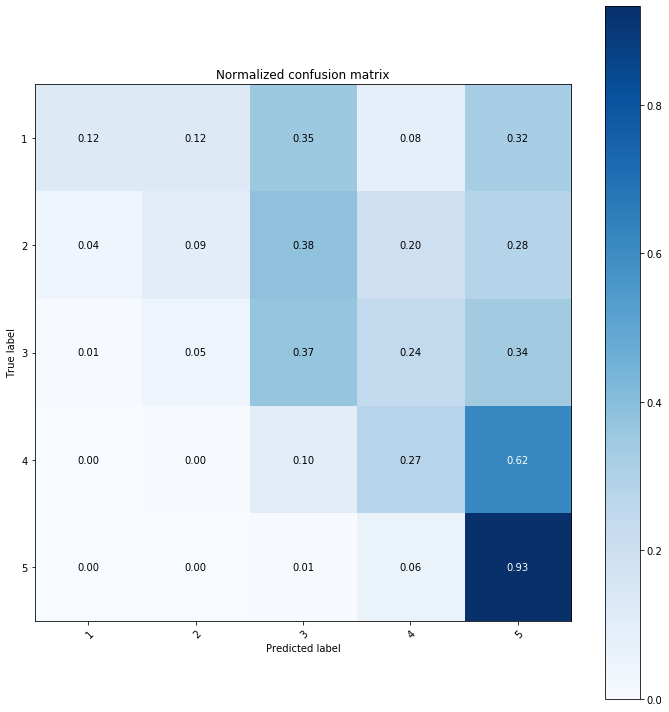

In [30]:
lr = train_lr(X_train, y_train, best_c=best_c)
lr_preds = evaluate_classifier(lr, X_test, y_test)

### Exercise 7
Try to change the features and re-train the KNN and Logistic Regression classifiers. 
- What happens if you filter out words that are too frequent or less frequent? 
- What happens if we use bigrams our trigrams? 
- What happens if we use a stop-word list?
- What happens if we use counts of words instead of the binary approach?

In [ ]:
#exercise 4 area

#change the parameters below to solve the exercise
#binary: whether or not we use the binary approach
#max_df: maximum frequency
#min_df: minimum frequency
#ngram_range: n-grams considered 
#sw: whehter or not we should use a stopwords list
X_train, X_val, X_test = extract_features(binary=False, max_df=1.0, min_df=0.0, ngram_range=(1,1), sw=True)

In [ ]:
##KNN - you can also change n_neighbors values
knn = train_knn(X_train, y_train, n_neighbors=3)
knn_preds = evaluate_classifier(knn, X_test, y_test)

In [ ]:
##LR - you can also change C values
best_c = optimise_C(X_train, y_train, X_val, y_val, C=[0.01, 0.025, 0.05, 0.1, 0.5, 1.0])
lr = train_lr(X_train, y_train, best_c=best_c)

In [ ]:
#test the new LR classifier
lr_preds = evaluate_classifier(lr, X_test, y_test)